**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved 

#Project Lasso Regression to predict breast cancer
In this project, you will evaluate the features of a dataset to train linear regression and lasso regression models.  
Please reference the video lecture on Lasso Regression for a description of this example dataset and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  
Note, in the lecture and in most literature, the Lasso regression regularization parameter is denoted as "lambda", but in the sklearn model, it is called "alpha".

-  **Step 1**:  Download the dataset file from the Github repository for this course (the link is provided in the materials document in the LMS).  Upload the file to your Colab files folder so that you can access it from your script. Read in the provided csv file: "BreastCancerDataset.csv" into a pandas dataframe.  Note the dataset has been prepared to include all the features used in the study as well as a "Result" column.  You MUST use this file in your project.
-  **Step 2**:  Inspect the dataset, note the features (indep vars) and the result (last column). Drop any unwanted rows or columns from the dataframe (e.g. 'unnamed')
-  **Step 3**:  Read the features (all but then 'Result' column) into a numpy array.
-  **Step 4**:  Read the results column ('Result') into the Y variable
-  **Step 5**:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
-  **Step 6**:  Train the Lasso algorithm, using the default fit function (alpha=1.0).  Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
-  **Step 7**:  Calculate the train and test scores.
-  **Step 8**:  Find the number of non-0 coefficients used.
-  **Step 9**:  Print out the results for the scores and number of coeffs used.
-  **Step 10**: Repeat steps 6-9 for alpha= 0.5, 0.05
-  **Step 11**: Run with Linear regression (alpha=0)
-  **Step 12**: Visualize your output on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index for each of the regression equation models computed above.
-  **Step 13**: Find the optimum value for alpha.  Please reference the lecture on guidelines on how to evaluate when an alpha (lambda) value is trending towards overfitting or underfitting the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LassoRegression

Mounted at /content/drive
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LassoRegression



Train Score: 0.5600974529893081
Test Score: 0.5832244618818156

Number of non-0 coefficients: 3


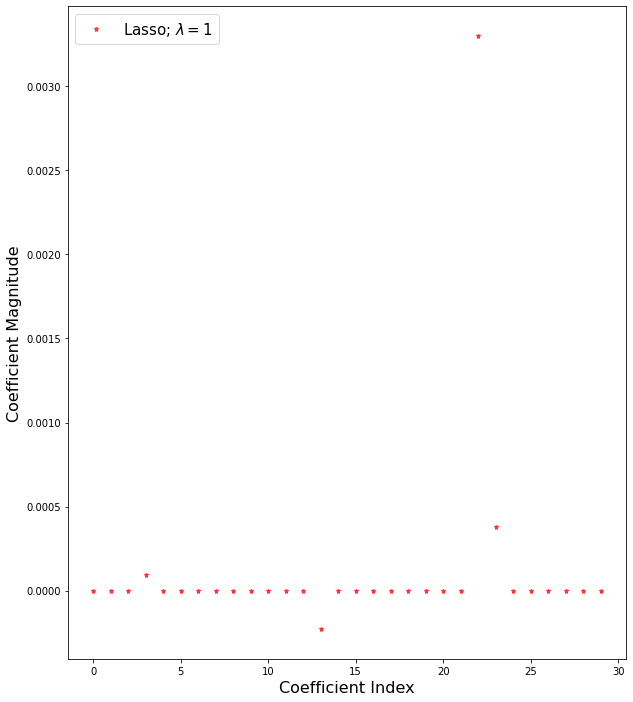

The best alpha value for lambda is 0.01

    Train Score: 0.7037865778498829
    Test Score: 0.6641831577726228

 



<ipython-input-42-4835310683ff>:98: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModel.fit(X_train, Y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+01, tolerance: 9.347e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [42]:
#Project Lasso Regression to predict breast cancer
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#Import the libraries
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Read the project dataset.
#Step 1:  Download the dataset 
#         Upload the file to your Colab files folder so that you can access it 
#         from your script. Read in the provided csv file: "BreastCancerDataset.csv" 
#         into a pandas dataframe.  Note the dataset has been prepared to include all 
#         the features used in the study as well as a "Result" column.  
#         You MUST use this file in your project.

# TODO:  Your code here...
breastCancer_DataFrame = pd.read_csv("breast_cancer_data.csv")


#Step 2:  Inspect the dataset, note the features (indep vars) and the result (second column).
#         Hint:  use the Pandas 'drop' function to remove unwanted rows or columns from the dataframe.
# TODO:  Your code here...
#Frop the unneeded 'id', 'diagnosis' collumn
breastCancer_DataFrame = breastCancer_DataFrame.drop(columns=['id', 'diagnosis'])
X = breastCancer_DataFrame.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

#Step 3:  Read the features (all but then 'Result' column) into a numpy array.
#         Hint:  Create a column headers array and use that with the Pandas to_numpy() function to create the independent variable X. 
#Step 4:  Read the results column ('Result') into the Y variable
#         Hint:  Use the Pandas 'values function or to_numpy() to return a numpy representation of the Result column into a dependent variable Y
# TODO:  Your code here...
Y = breastCancerDiagnosis = pd.read_csv("breast_cancer_data.csv")[['diagnosis']].to_numpy()
#apply OneHotEncoding to the Y collumn
MALIGNANT = 1
BENIGN = 0

for i in range(len(breastCancerDiagnosis)):
  if(breastCancerDiagnosis[i] == 'M'):
    breastCancerDiagnosis[i] = MALIGNANT
  elif(breastCancerDiagnosis[i] == 'B'):
    breastCancerDiagnosis[i] = BENIGN
  else:
    raise Exception("ERROR: CAN ONLY BE MALIGNANT OR BENIGN")


#Step 5:  Create a training and test split of 70% train and 30% test from the dataset. Use a random_state of 31.
# TODO:  Your code here...
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=31)

#Step 6:  Train the Lasso algorithm, using the default fit function (alpha=1.0).  
#         Note that "alpha" in the sklearn model is equivalent to the lecture "lambda".
#         Hint:  Remember to instantiate the 'Lasso' object before training your model.
#Step 7:  Calculate the train and test scores.
#Step 8:  Find the number of non-0 coefficients used.
#Step 9:  Print out the results for the scores and number of coeffs used.
# TODO:  Your code here...

lasso1 = Lasso()
lasso1.fit(X_train, Y_train)

non_0_coefs = 0
for j in range(len(lasso1.coef_)):
  if(lasso1.coef_[j] > 0):
    non_0_coefs += 1

print("""
Train Score: {}
Test Score: {}

Number of non-0 coefficients: {}""".format(lasso1.score(X_train, Y_train), lasso1.score(X_test, Y_test), non_0_coefs))

#Step 12: Visualize your ouput on a Matplotlib graph of Coefficient Magnitudes vs. Coefficient Index 
#         for each of the regression equation models computed above.
#         Hint:  the following code will create a figure and plot the coefficients for a group of coefficients.
plt.figure(figsize=(10,12))
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\lambda = 1$',zorder=7) 
#TODO: Add your other cases here
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=15,loc='best')
plt.show()



#Step 13: Find the optimum value for alpha.  
#         Please reference the lecture on guidelines on how to evaluate when an alpha (lambda) 
#         value is trending towards overfitting or underfitting the dataset.
# TODO:  Your code here...
def optimize_lambda(X_train, X_test, Y_train, Y_test, prevTrainScore=0, prevTestScore=0, lambdaValue=0):
  lassoModel= Lasso(alpha=lambdaValue)
  lassoModel.fit(X_train, Y_train)

  trainScore = lassoModel.score(X_train, Y_train)
  testScore = lassoModel.score(X_test, Y_test)
  
  if(trainScore > (testScore+10)):
    print("""Watch out, the model might be overfitting. Here are the numbers:
    Train Score: {}
    Test Score: {}""".format(trainScore, testScore))
  
  if((trainScore > prevTrainScore) and ((testScore) < trainScore < (testScore+3))):
    optimize_lambda(X_train, X_test, Y_train, Y_test, trainScore, testScore, lambdaValue+0.01)
  else:
    print("The best alpha value for lambda is", lambdaValue)
    print("""
    Train Score: {}
    Test Score: {}""".format(trainScore, testScore))
    print("\n \n")

optimize_lambda(X_train, X_test, Y_train, Y_test)